# Homework 2 - Least Sqaures
Make sure you have downloaded:
- housing.csv


## AI Assistance
We understand that we cannot stop you from using AI to help you with your homework. We also recognize that this is a skill that will be useful in the real world. With that in mind, we allow the assitence of AI on your homework. 

#### <span style="color:red">HOWEVER, you must include the prompt you used to get the answer in your submission. Additionally, you should give a brief explanation of what worked and what didn't with regard to the AI.</span>

There will be an additional cell after each question so that you can include your prompt and explanation.

Some homework assignments may also include a problem in which you are explicity asked to use AI. You must still include your prompt and explanation in the cell provided.

##### <span style="color:blue">Note: Exams are going to be on paper and proctored (i.e. without the use of AI). If you rely too heavily on AI assistance to complete your homework you may see determental effects on your exam performance.</span>

In this assignment we will use data about the price of housing vs lot size

In [1]:
######## DO NOT CHANGE THIS CODE ##########
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("housing.csv")
display(df)
###########################################

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


# 1 Create training and test data
## 1.1 Get x and y
**Task:**

[1 pt] Define the following numpy arrays by choosing the correct columns of the housing dataframe:
- `x`, which contains the 'lotsize' column
- `y`, which contains the 'price' column
- For numerical stability reasons, rescale 'lotsize' column by dividing every entry by 1000. So the units for any subsequent plots are in thousands.
- For numerical stability reasons, rescale 'price' column by dividing every entry by 10,000. So the units for any subsequent plots are in ten thousands.
- For the rest of the homework, assume these units. you do not need to rescale it back.

In [2]:
# TODO extract price and lotsize columns as np arrays
x, y =  df['lotsize'].values.astype('float64'), df['price'].values.astype('float64')
x *= 1e-3
y *= 1e-4

# print the shapes of X and Y
print('X:', x.shape)
print('y:', y.shape)

X: (546,)
y: (546,)


### 1.1 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 1.2 Train-test split
**Task:**

[2 pts] Create new numpy column arrays called `x_train`, `x_test`, `y_train`, and `y_test`, where:
- you use train_test_split() function from sklearn.model_selection
- the training dataset contains the 80% of samples
- the testing dataset contains the 20% of samples
- random state set to 0.

In [3]:
# TODO split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# print the shapes of training and test sets
print('X_train: ', x_train.shape)
print('X_test : ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test : ', y_test.shape)

X_train:  (436,)
X_test :  (110,)
y_train:  (436,)
y_test :  (110,)


### 1.2 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 1.3 Scatter plot
**Task:**

1. [2 pts] On the same figure, make scatter plots of the training and testing data.
    - x-coordinate should be lot size, x
    - y-coordinate should be the price, y.
2. [1 pt] Use markers with different shapes and colors to show to training and testing datasets. 

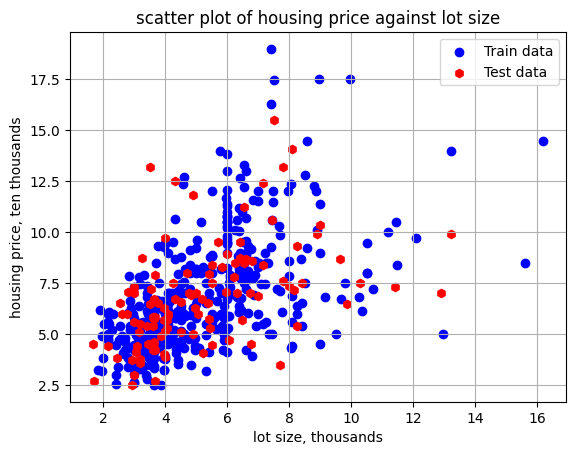

In [4]:
# TODO plot

plt.scatter(x_train, y_train, c = 'blue', marker = 'o', label = 'Train data')
plt.scatter(x_test, y_test, c = 'red', marker = 'h', label = 'Test data')

plt.title('scatter plot of housing price against lot size')
plt.xlabel('lot size, thousands')
plt.ylabel('housing price, ten thousands')
plt.legend()
plt.grid()
plt.show()

### 1.3 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

# 2 (sklearn) Least Squares Linear Regression
## 2.1 Obtain coefficients
Recall the model for 1-variable linear regression, 
$$
    y=\beta_0 + \beta_1 x.
$$
Here $\beta_0$ is the intercept and $\beta_1$ is the slope.

**Task:**

[3 pts] Use sklearn.linear_model.LinearRegression to fit a linear model to the training data. (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- You may need to reshape the data to column arrays by array.reshape(-1,1).

Extract the fitted values for $\beta_0$ and $\beta_1$ and print them.

In [45]:
from sklearn.linear_model import LinearRegression
# TODO use sklearn
x_reg = x_train.reshape(-1, 1)
model = LinearRegression()
reg = model.fit(x_reg, y_train)

print('beta0 = ', reg.intercept_) # got error from intercept_[0]
print('beta1 = ', reg.coef_[0]) # got error from coef_[0,0]

beta0 =  3.213951578209438
beta1 =  0.7000228875604558


### 2.1 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 2.2 
**Task:**

[2 pts] Use your sklearn fitted model to make a prediction about the `y` on the test dataset. Name the predicted values of `y_test_pred`. 

In [46]:
# TODO predict on the test set
x_test_pred = x_test.reshape(-1,1)
Y_test_pred = model.predict(x_test_pred)

### 2.2 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 2.3 Plot
**Task:**

[6 pts] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots based on the fitted linear model:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points.
3. Straight line plot of linear model. 

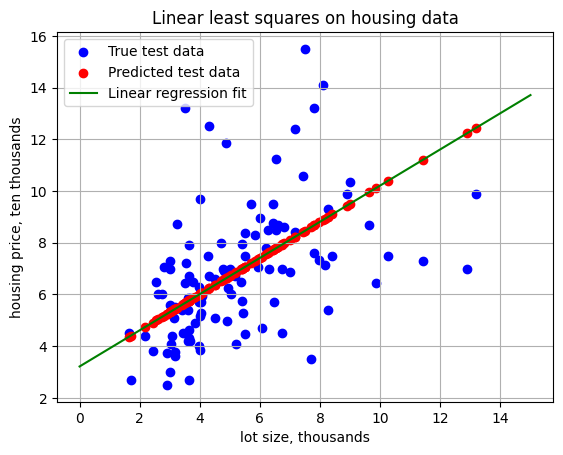

In [51]:
# TODO plot

plt.scatter(x_test, y_test, c = 'blue', label = 'True test data')
plt.scatter(x_test, Y_test_pred, c = 'red', label = 'Predicted test data')

x1 = np.linspace(0, 15, 500)
y1 = x1 * reg.coef_[0] + reg.intercept_ 
plt.plot(x1, y1, c = 'green', label = 'Linear regression fit')

plt.title('Linear least squares on housing data')
plt.xlabel('lot size, thousands')
plt.ylabel('housing price, ten thousands')
plt.legend()
plt.grid()
plt.show()

### 2.3 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

# 2.4 Discuss
**Task:**

[2 pts] Is the method of the least squares linear regression appropriate for the housing data? Why or why not? In particular, we seek your reflection on whether the data is suitable for linear modelling.

**Ans:** 
The method of least squares linear regression is NOT appropriate for the housing data because the data does not follow a linear trend. The plot in Part 2.3 shows that, qualitatively, the residuals between the predicted linear trend and the true data points are very high. 



# 2.4 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

# 3 (Manual) Least Squares on 4th order polynomial
We now consider higher degree polynomial model.
$$
y = \beta_0 + \beta_1 x + \dots + \beta_4 x^4.
$$
**NOTE:** Sklearn package is not allowed in this section.

## 3.1 Design Matrix
We rewrite the model in the matrix form,
$$
    y = X\beta.
$$
Suppose we have $n$ data points in the train set, then $X$ will be a $n\times 5$ matrix. Each row of $X$ represents a datapoint, and each column of $X$ represents a term in the polynomial model, that is, the first column corresponds to ones, the last column corresponds to $x^4$, etc. $\beta$ is a column vector consists of $\beta_0,\dots, \beta_4$.

**Task:**

[2 pts] Write a function `makeX(x, deg)` that takes a 1D array x and an integer degree, and returns the design matrix $X$ for a polynomial model.

In [57]:
def makeX(x, deg):
    X = np.ones((x.size, deg + 1))
    # TODO generate the design matrix
    
    for i in range(x.size):
        for j in range(1, deg + 1):
            X[i, j] = x[i] ** j
    return X

### 3.1 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 3.2 Obtain Coefficients
The solution of the least square model can be expressed in the matrix form,
$$
    \hat{\beta}=(X^TX)^{-1}X^T y=X^\dagger y.
$$

**Task:**

[2 pt] Compute the fitted coefficients $\beta_0, \dots, \beta_4$ using this formula. Store the values in a 1D array `beta_poly`.

In [ ]:
# TODO obtain the design matrix for a fourth order polynomial model with train data


# TODO compute the coefficient

beta_poly = None

for i in range(5):
    print('beta_%d = %.12f' % (i, beta_poly[i]))

### 3.2 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 3.3 Predict

**Task:**

[2 pts] Use your fitted coefficients to make a prediction about `y` on the test dataset. Name the predicted values of `Y_test_pred_poly`. Your method should involve matrix multiplications.

In [40]:
# TODO

Y_test_pred_poly = None

### 3.3 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 3.4 Plot
**Task:**

[6 pts] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots based on the fitted polynomial model:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points.
3. Curved line plot of polynomial model. 

In [ ]:
# TODO plot


plt.title('Polynomial least squares on housing data')
plt.xlabel('lot size, thousands')
plt.ylabel('housing price, ten thousands')
plt.legend()
plt.grid()
plt.show()

### 3.4 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 3.5 Compare linear (1st order) and polynomial (4th order)
The units for the outputs in this problem should be kept in thousands. In other words, you do not need to rescale your answers by **1000** to the units of the original dataset.

**Task:**

1. [2 pts] Compute the mean squared error (MSE) on the test points of both:
- 1st order model, `mse_linear`
- 4th order model, `mse_poly`

The residual is the actual values of `y` minus the predicted values from the model. MSE is the average of squared residual.

In [ ]:
# TODO compute MSE
mse_linear = None
mse_poly = None

print('mse_linear:', mse_linear)
print('mse_poly  :', mse_poly)

**Task:**

2. [2 pts] Which MSE is smaller? Does it necessarily mean that the model with smaller RSS is always "better"? Why or why not?

**Ans:** 

### 3.5 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made: